In [1]:
import sys
sys.path.append('../')
from pyACC.clustering.mock_generator import generate_gaussian_map, generate_lognormal_map, poisson_sample_map
from pyACC.clustering.clustering_measure import get_power_spectrum, count_pairs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

import camb


In [2]:
Omega_b= 0.05
Omega_c = 0.25
h=0.7
As = 2.1e-09
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)
pars.set_matter_power(redshifts=[0.], kmax=100.)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1.e-4, maxkh=100, npoints=512)

In [3]:
# define power spectrum interpolator
pk_func = interp1d(kh, pk[0], fill_value='extrapolate', kind='cubic')

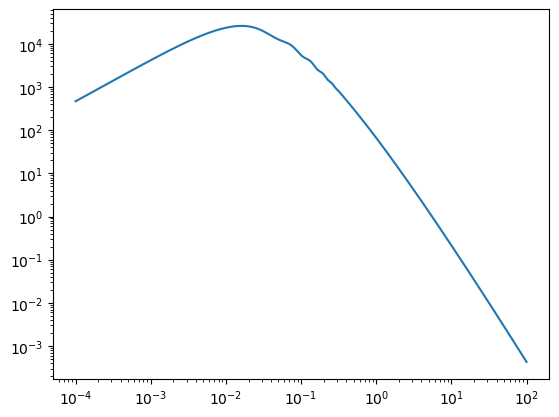

In [4]:
plt.loglog(kh, pk[0])

In [5]:
# define the box
side = 500      #Mpc/h
spacing = 5     #Mpc/h

In [6]:
delta_x = generate_lognormal_map(pk_func, side, spacing)

In [7]:
Nobjects = 200000
catalog = poisson_sample_map(delta_x, side, spacing, Nobjects)

In [8]:
catalog.shape

(19385, 3)

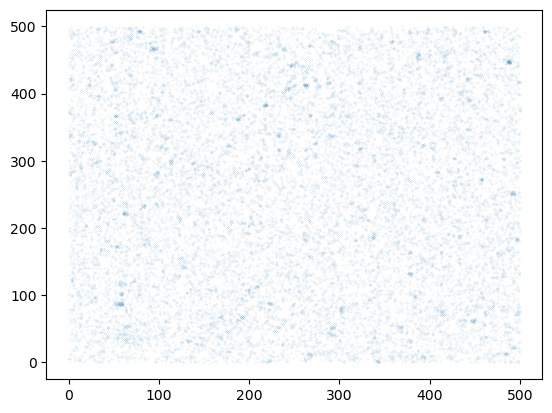

In [9]:
plt.plot(catalog[:,0], catalog[:,1],'.', ms = 0.1)

In [10]:
# count pairs

r_edges = np.linspace(0,50,11)
r_bins = (r_edges[1:]+r_edges[0:-1])/2
print(r_edges)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]


In [11]:
DD = count_pairs(catalog, r_edges)

  0%|          | 0/19385 [00:00<?, ?it/s]

In [12]:
random_sample = np.random.uniform(0,side,(Nobjects,3))

In [13]:
RR = count_pairs(random_sample, r_edges)

  0%|          | 0/200000 [00:00<?, ?it/s]

In [14]:
RR.shape, DD.shape

((10,), (10,))

In [15]:
DR = count_pairs(catalog, r_edges, random_sample)

  0%|          | 0/19385 [00:00<?, ?it/s]

In [16]:
norm_DD = DD/(len(catalog)*(len(catalog)-1)/2)
norm_RR = RR/(len(random_sample)*(len(random_sample)-1)/2)
norm_DR = DR/(len(catalog)*len(random_sample))

In [17]:
xi_LS = (norm_DD-2*norm_DR+norm_RR)/norm_RR

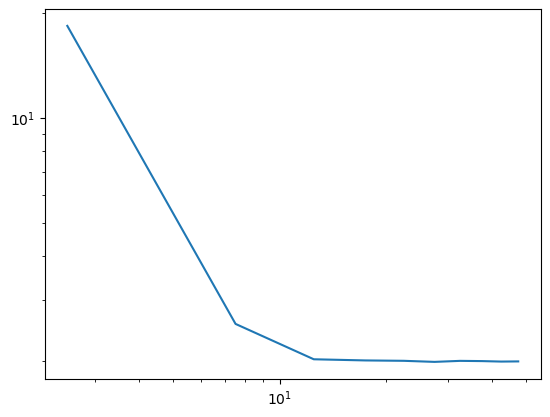

In [18]:
plt.loglog(r_bins, xi_LS)